# BOSTON CRIME ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()
%matplotlib inline

Loading BokehJS ...

### Loading Data

In [2]:
df= pd.read_csv('https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b/download/tmp7l4navhc.csv')

In [3]:
df.head(10)# first 10 records


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192020490,3301,Verbal Disputes,VERBAL DISPUTE,D14,794,NaN,2019-03-19 21:36:00,2019,3,Tuesday,21,Part Three,ALLSTON ST,42.349842,-71.136789,"(42.34984183, -71.13678902)"
1,I192020488,1402,Vandalism,VANDALISM,B3,565,NaN,2019-03-19 18:08:00,2019,3,Tuesday,18,Part Two,OSPREY WAY,42.292033,-71.093993,"(42.29203320, -71.09399300)"
2,I192020485,3207,Property Found,PROPERTY - FOUND,B2,310,NaN,2019-03-19 21:01:00,2019,3,Tuesday,21,Part Three,HAZELWOOD ST,42.317278,-71.082504,"(42.31727763, -71.08250414)"
3,I192020484,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,255,NaN,2019-03-19 20:50:00,2019,3,Tuesday,20,Part One,DORCHESTER AVE,42.311685,-71.057503,"(42.31168453, -71.05750327)"
4,I192020480,3112,Landlord/Tenant Disputes,LANDLORD - TENANT SERVICE,B2,323,NaN,2019-03-19 20:27:00,2019,3,Tuesday,20,Part Three,GLENBURNE ST,42.315332,-71.082433,"(42.31533179, -71.08243309)"
5,I192020479,3301,Verbal Disputes,VERBAL DISPUTE,B2,258,NaN,2019-03-19 19:48:00,2019,3,Tuesday,19,Part Three,DUDLEY ST,42.317905,-71.067069,"(42.31790476, -71.06706881)"
6,I192020478,3301,Verbal Disputes,VERBAL DISPUTE,B2,331,NaN,2019-03-19 19:46:00,2019,3,Tuesday,19,Part Three,DRAYTON AVE,42.312158,-71.070568,"(42.31215757, -71.07056813)"
7,I192020477,3501,Missing Person Reported,MISSING PERSON,B2,612,NaN,2019-03-19 20:30:00,2019,3,Tuesday,20,Part Three,LONGWOOD AVE,NaN,NaN,"(0.00000000, 0.00000000)"
8,I192020476,3301,Verbal Disputes,VERBAL DISPUTE,C11,397,NaN,2019-03-19 18:44:00,2019,3,Tuesday,18,Part Three,CENTRE ST,42.290700,-71.069913,"(42.29070005, -71.06991285)"
9,I192020475,3301,Verbal Disputes,VERBAL DISPUTE,C11,387,NaN,2019-03-19 20:16:00,2019,3,Tuesday,20,Part Three,BEARSE AVE,42.271297,-71.063240,"(42.27129722, -71.06323991)"


In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
print(df.shape)# getting shape of our dataframe

(371225, 17)


### Clean up of DataFrame

In [6]:
df.fillna(value=0)#Replaces all missing values with 0 

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192020490,3301,Verbal Disputes,VERBAL DISPUTE,D14,794,0,2019-03-19 21:36:00,2019,3,Tuesday,21,Part Three,ALLSTON ST,42.349842,-71.136789,"(42.34984183, -71.13678902)"
1,I192020488,1402,Vandalism,VANDALISM,B3,565,0,2019-03-19 18:08:00,2019,3,Tuesday,18,Part Two,OSPREY WAY,42.292033,-71.093993,"(42.29203320, -71.09399300)"
2,I192020485,3207,Property Found,PROPERTY - FOUND,B2,310,0,2019-03-19 21:01:00,2019,3,Tuesday,21,Part Three,HAZELWOOD ST,42.317278,-71.082504,"(42.31727763, -71.08250414)"
3,I192020484,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,255,0,2019-03-19 20:50:00,2019,3,Tuesday,20,Part One,DORCHESTER AVE,42.311685,-71.057503,"(42.31168453, -71.05750327)"
4,I192020480,3112,Landlord/Tenant Disputes,LANDLORD - TENANT SERVICE,B2,323,0,2019-03-19 20:27:00,2019,3,Tuesday,20,Part Three,GLENBURNE ST,42.315332,-71.082433,"(42.31533179, -71.08243309)"
5,I192020479,3301,Verbal Disputes,VERBAL DISPUTE,B2,258,0,2019-03-19 19:48:00,2019,3,Tuesday,19,Part Three,DUDLEY ST,42.317905,-71.067069,"(42.31790476, -71.06706881)"
6,I192020478,3301,Verbal Disputes,VERBAL DISPUTE,B2,331,0,2019-03-19 19:46:00,2019,3,Tuesday,19,Part Three,DRAYTON AVE,42.312158,-71.070568,"(42.31215757, -71.07056813)"
7,I192020477,3501,Missing Person Reported,MISSING PERSON,B2,612,0,2019-03-19 20:30:00,2019,3,Tuesday,20,Part Three,LONGWOOD AVE,0.000000,0.000000,"(0.00000000, 0.00000000)"
8,I192020476,3301,Verbal Disputes,VERBAL DISPUTE,C11,397,0,2019-03-19 18:44:00,2019,3,Tuesday,18,Part Three,CENTRE ST,42.290700,-71.069913,"(42.29070005, -71.06991285)"
9,I192020475,3301,Verbal Disputes,VERBAL DISPUTE,C11,387,0,2019-03-19 20:16:00,2019,3,Tuesday,20,Part Three,BEARSE AVE,42.271297,-71.063240,"(42.27129722, -71.06323991)"


In [7]:
crimes= df[['OFFENSE_CODE_GROUP']]
crimes.head()

,OFFENSE_CODE_GROUP
0,Verbal Disputes
1,Vandalism
2,Property Found
3,Aggravated Assault
4,Landlord/Tenant Disputes


In [8]:
crimes_count = pd.DataFrame(crimes.groupby('OFFENSE_CODE_GROUP').size().sort_values(ascending=False).rename('counts').reset_index())
crimes_count.head() #Gives the count of most committed crimes in descending order

,OFFENSE_CODE_GROUP,counts
0,Motor Vehicle Accident Response,43245
1,Larceny,30251
2,Medical Assistance,27977
3,Investigate Person,21533
4,Other,20873


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

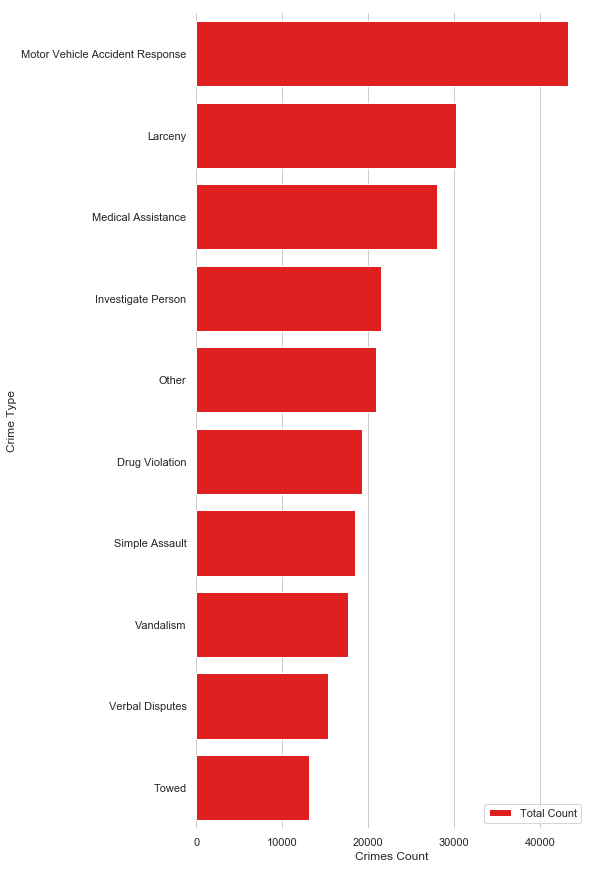

In [10]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 15))


# Plot the total crime counts
sns.barplot(x="counts", y="OFFENSE_CODE_GROUP", data=crimes_count.iloc[:10, :],
            label="Total Count", color="red")

ax.legend(loc="best")# Add a legend
ax.set(ylabel="Crime Type", xlabel="Crimes Count")
sns.despine(left=True, bottom=True)# removes the default boxed axis style and places only the left and bottom axis

plt.show()

#### As observed the motor vehicle accident response crime was the most committed in the city of Boston for the years 2015 to 2019

# Crimes  Trends over the Years

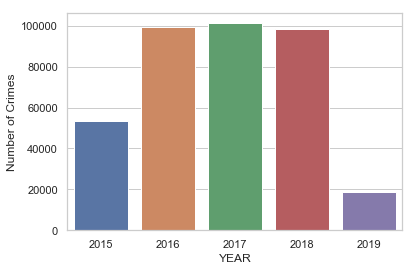

In [11]:
sns.countplot(x="YEAR", data=df)
plt.ylabel('Number of Crimes')
plt.show()

#### Crime was highest during the year 2017. Almost same number of cases have been reported in 2016 and 2018. Hitherto crime was lowest in 2019

### Comparing crimes per month

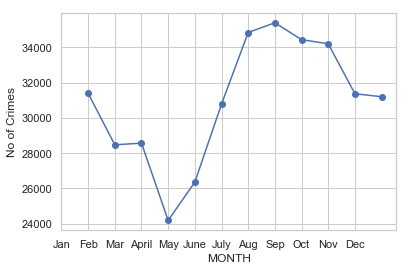

In [12]:
df.groupby("MONTH")['INCIDENT_NUMBER'].count().plot(marker='o')
months=['Jan','Feb','Mar','April','May','June','July','Aug','Sep','Oct','Nov','Dec']
plt.xticks(np.arange(12),months)
plt.ylabel("No of Crimes")
plt.show()

##### Crime rates drop in the Winter and Spring  Months.

## Comparing crimes per month in 2015 to 2019

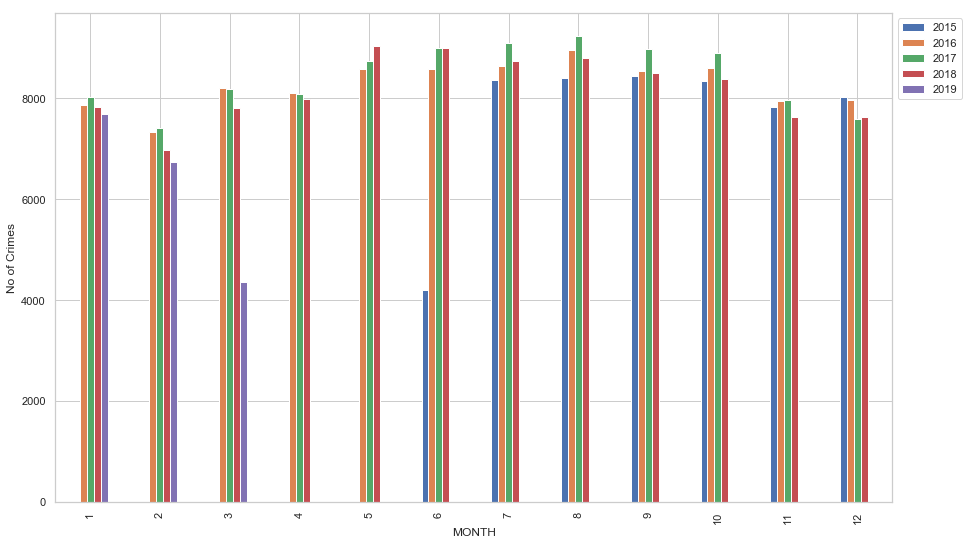

In [13]:
df.groupby(['MONTH','YEAR'])['INCIDENT_NUMBER'].count().unstack().plot(kind='bar',figsize=(15,9))
plt.legend(loc="best", bbox_to_anchor=(1,1))#Places Legend outside the plot area
plt.ylabel("No of Crimes")
plt.show()

## Weekly trend of Crimes

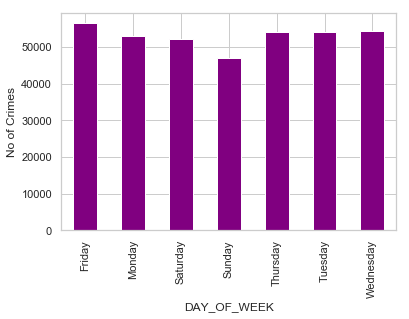

In [14]:
df.groupby('DAY_OF_WEEK')['INCIDENT_NUMBER'].count().plot(kind='bar',color='purple')
plt.ylabel("No of Crimes")
plt.show()

### Crimes was lowest on Sundays and highest on Fridays

## Top 10 locations of Crime

In [103]:
crime=df.groupby('STREET')['INCIDENT_NUMBER'].count().sort_values(ascending=False)
crime=crime[:10]
crime

STREET
WASHINGTON ST        16683
BLUE HILL AVE         9109
BOYLSTON ST           8390
DORCHESTER AVE        5915
TREMONT ST            5590
MASSACHUSETTS AVE     5458
HARRISON AVE          5429
CENTRE ST             5160
COMMONWEALTH AVE      4853
HYDE PARK AVE         4099
Name: INCIDENT_NUMBER, dtype: int64

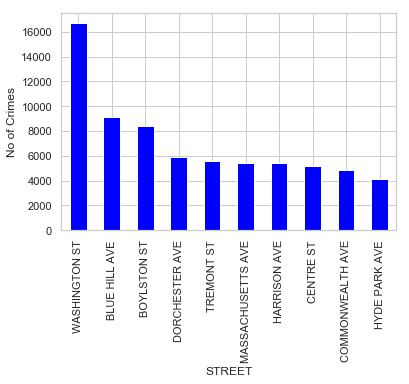

In [104]:
crime.plot(kind='bar',color="blue")
plt.ylabel("No of Crimes")
plt.show()

In [17]:
crime=df.groupby('HOUR')['INCIDENT_NUMBER'].count().sort_values(ascending=False)
crime

HOUR
17    24230
18    23602
16    23140
12    21740
19    20375
14    20106
13    19655
15    19300
11    19137
10    19099
20    18238
0     17743
9     17131
21    16395
8     15218
22    14921
23    12192
1     10700
7     10346
2      8992
6      5821
3      5305
4      3940
5      3899
Name: INCIDENT_NUMBER, dtype: int64

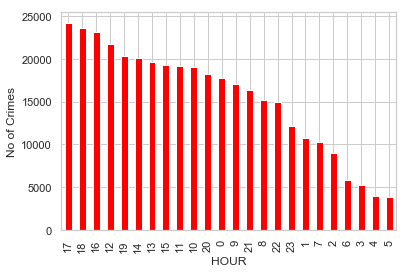

In [18]:
crime.plot(kind='bar',color="red")
plt.ylabel("No of Crimes")
plt.show()

#### Most crimes occurred at 1700 hrs

# Analyzing Top 5 Crimes in Boston

In [19]:
top_crimes=df[(df['OFFENSE_CODE_GROUP']=='Motor Vehicle Accident Response')|(df['OFFENSE_CODE_GROUP']=='Larceny')|(df['OFFENSE_CODE_GROUP']=='Medical Assistance')|(df['OFFENSE_CODE_GROUP']=='Investigate Person')|(df['OFFENSE_CODE_GROUP']=='Other')]

In [20]:
crime_month=top_crimes.pivot_table(values='INCIDENT_NUMBER',index='MONTH',columns='YEAR',aggfunc=np.size)
crime_month

YEAR,2015,2016,2017,2018,2019
MONTH,,,,,
1,NaN,2986.0,2942.0,3248.0,3090.0
2,NaN,2711.0,2879.0,2729.0,2695.0
3,NaN,3118.0,3204.0,3099.0,1775.0
4,NaN,2971.0,3142.0,3102.0,NaN
5,NaN,3298.0,3382.0,3534.0,NaN
6,1582.0,3108.0,3578.0,3420.0,NaN
7,3029.0,3131.0,3499.0,3419.0,NaN
8,3038.0,3405.0,3534.0,3484.0,NaN
9,3125.0,3306.0,3604.0,3380.0,NaN


### Let's visualize this using a heat map

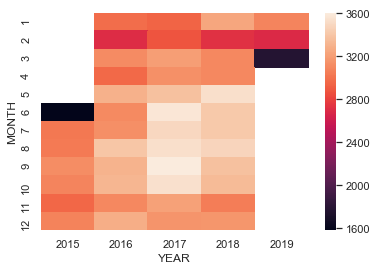

In [21]:
sns.heatmap(crime_month)
plt.show()

#### An Intense amount of top criminal activities have happened from May to September. Shown clearly in the below scatter plot

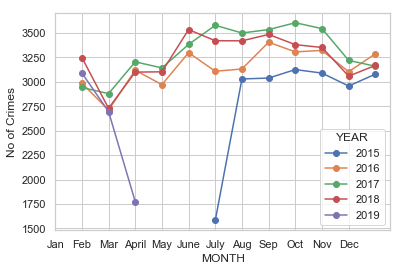

In [22]:
top_crimes.groupby(['MONTH','YEAR'])['INCIDENT_NUMBER'].count().unstack().plot(marker='o')
plt.xticks(np.arange(12),months)
plt.ylabel("No of Crimes")
plt.show()

In [23]:
crime_month=top_crimes.pivot_table(values='INCIDENT_NUMBER',index='OFFENSE_CODE_GROUP',columns='MONTH',aggfunc=np.size)
crime_month

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
OFFENSE_CODE_GROUP,,,,,,,,,,,,
Investigate Person,1641,1527,1629,1337,1508,1678,1871,2058,2186,2008,2063,2027
Larceny,2525,2139,2017,1847,1988,2534,3027,3040,2856,2883,2610,2785
Medical Assistance,2572,2339,2422,1941,2210,2256,2407,2308,2451,2363,2311,2397
Motor Vehicle Accident Response,3631,3316,3440,2740,3031,3536,3843,4010,3939,4154,3689,3916
Other,1897,1693,1688,1350,1477,1684,1930,2045,1983,1897,1664,1565


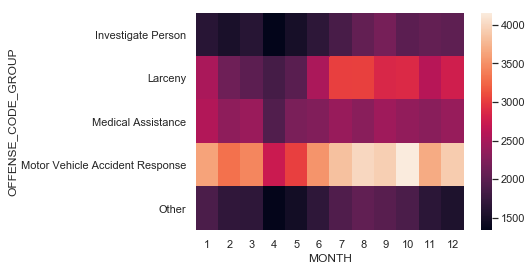

In [24]:
sns.heatmap(crime_month)
plt.show()

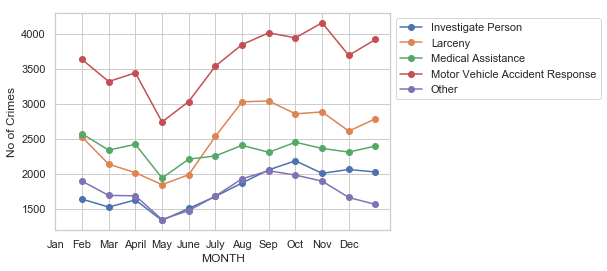

In [25]:
top_crimes.groupby(['MONTH','OFFENSE_CODE_GROUP'])['INCIDENT_NUMBER'].count().unstack().plot(marker='o')
plt.xticks(np.arange(12),months)
plt.legend(loc="best",bbox_to_anchor=(1,1))
plt.ylabel("No of Crimes")
plt.show()

In [26]:
crime_day_of_week=top_crimes.pivot_table(values='INCIDENT_NUMBER',index='OFFENSE_CODE_GROUP',columns='DAY_OF_WEEK',aggfunc=np.size)
crime_day_of_week

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
OFFENSE_CODE_GROUP,,,,,,,
Investigate Person,3341,3054,2801,2687,3182,3213,3255
Larceny,4627,4330,4229,3599,4443,4510,4513
Medical Assistance,4048,4095,3725,3575,4165,4142,4227
Motor Vehicle Accident Response,6826,5941,6331,5886,6035,6120,6106
Other,3160,3070,2536,2379,3314,3160,3254


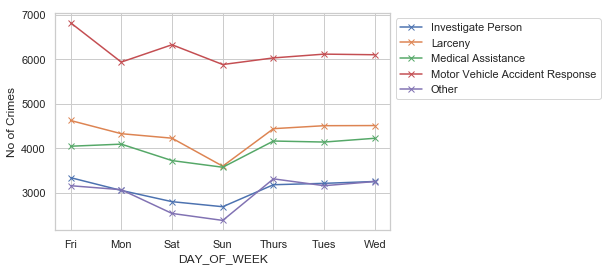

In [27]:
top_crimes.groupby(['DAY_OF_WEEK','OFFENSE_CODE_GROUP'])['INCIDENT_NUMBER'].count().unstack().plot(marker='x')
days=['Fri','Mon','Sat','Sun','Thurs','Tues','Wed']
plt.xticks(np.arange(7),days)
plt.legend(loc="best",bbox_to_anchor=(1,1))
plt.ylabel("No of Crimes")
plt.show()

## Locations where these top 5 Crimes have occured

In [ ]:
loc=list(top_crimes['STREET'].value_counts()[:20].index)
top_crimes['STREET']=np.where(top_crimes['STREET'].isin(loc),top_crimes['STREET'],'OTHER')

In [30]:
crime_street=top_crimes.pivot_table(values='INCIDENT_NUMBER',index='STREET',columns='OFFENSE_CODE_GROUP',aggfunc=np.size)
crime_street

OFFENSE_CODE_GROUP,Investigate Person,Larceny,Medical Assistance,Motor Vehicle Accident Response,Other
STREET,,,,,
ADAMS ST,110,103,180,515,132
AMERICAN LEGION HWY,87,236,90,475,118
BLUE HILL AVE,567,624,476,1476,459
BOYLSTON ST,301,2510,343,445,403
CAMBRIDGE ST,130,250,168,457,89
CENTRE ST,342,434,438,723,277
COLUMBIA RD,197,210,274,654,232
COLUMBUS AVE,123,306,176,444,128
COMMONWEALTH AVE,265,505,379,708,200
